In [1]:
import numpy as np

In [3]:
# speed

# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time 

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

2.649040937423706
0.13500118255615234


In [8]:
2.64/0.13
# the reson for this is 
# 1 numpy array is a static array 
# 2 in this the data is directly stored in memory not that the address is stored

20.307692307692307

In [6]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [7]:
a = np.arange(10000000,dtype=np.int8)
sys.getsizeof(a)

10000104

In [13]:
# convenience
#numpy is better as the operations are easier

# Advance indexing

In [9]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [10]:
a[1,2]

6

In [11]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [18]:
# Fancy Indexing

a[:,[0,2,3]], a[[0,1,3]] , a[[0,3,4]]

(array([[ 0,  2,  3],
        [ 4,  6,  7],
        [ 8, 10, 11],
        [12, 14, 15],
        [16, 18, 19],
        [20, 22, 23]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [12, 13, 14, 15]]),
 array([[ 0,  1,  2,  3],
        [12, 13, 14, 15],
        [16, 17, 18, 19]]))

In [19]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[74, 82, 30, 31],
       [71, 96, 58, 35],
       [20, 57, 45, 33],
       [76, 59, 78, 94],
       [47, 50, 64, 75],
       [26, 28, 78, 67]])

In [20]:
# find all numbers greater than 50
a[a > 50]

array([74, 82, 71, 96, 58, 57, 76, 59, 78, 94, 64, 75, 78, 67])

In [21]:
# find out even numbers
a[a % 2 == 0]

array([74, 82, 30, 96, 58, 20, 76, 78, 94, 50, 64, 26, 28, 78])

In [22]:
# find all numbers greater than 50 and are even

a[(a > 50) & (a % 2 == 0)]

array([74, 82, 96, 58, 76, 78, 94, 64, 78])

In [23]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([74, 82, 30, 31, 71, 96, 58, 20, 57, 45, 33, 76, 59, 78, 94, 47, 50,
       64, 75, 26, 78, 67])

# Broadcasting
The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [24]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [25]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


# Broadcasting Rules
* 1. Make the two arrays have the same number of dimensions.

If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.
* 2. Make each dimension of the two arrays the same size.

If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [26]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [27]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [28]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [29]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [30]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [31]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [32]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

# Working with mathematical formulas

In [33]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [40]:
# sigmoid
def sigmoid(array):
    return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [37]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [41]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

333.56

# Working with missing values

In [42]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [43]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

# Plotting Graphs

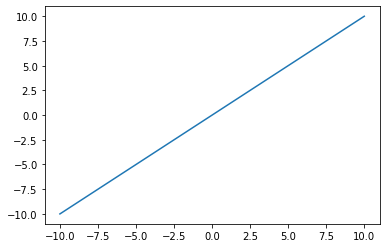

In [44]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)